In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

In [2]:
base_path = "/Users/sayan/CMB_WORK/Maps/"

cl_th = np.loadtxt(base_path + "COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt")
halfmap1 = hp.read_map(base_path + "COM_CMB_IQU-smica_2048_R3.00_hm1.fits", field=0)
halfmap2 = hp.read_map(base_path + "COM_CMB_IQU-smica_2048_R3.00_hm2.fits", field=0)
data = hp.read_map(base_path + "COM_CMB_IQU-smica_2048_R3.00_full.fits", field=0)
mask = hp.read_map(base_path + "COM_CMB_IQU-smica_2048_R3.00_full.fits", field=3)

In [3]:
elmax = 2048
pixwin = hp.pixwin(2048, lmax=elmax)
beam_l = hp.gauss_beam(np.radians(5/60), lmax=elmax)
bl_pix = beam_l/pixwin

In [4]:
count_of_ones = np.count_nonzero(mask == 1)
fsky = count_of_ones/(len(mask))

In [5]:
var2 = (halfmap1-halfmap2)/2
Nl = hp.anafast(var2*mask, lmax=elmax)/ (fsky * bl_pix**2) *1e12
Dl = hp.anafast(data*mask, lmax=elmax)/ (fsky * bl_pix**2) *1e12
signal = Dl - Nl

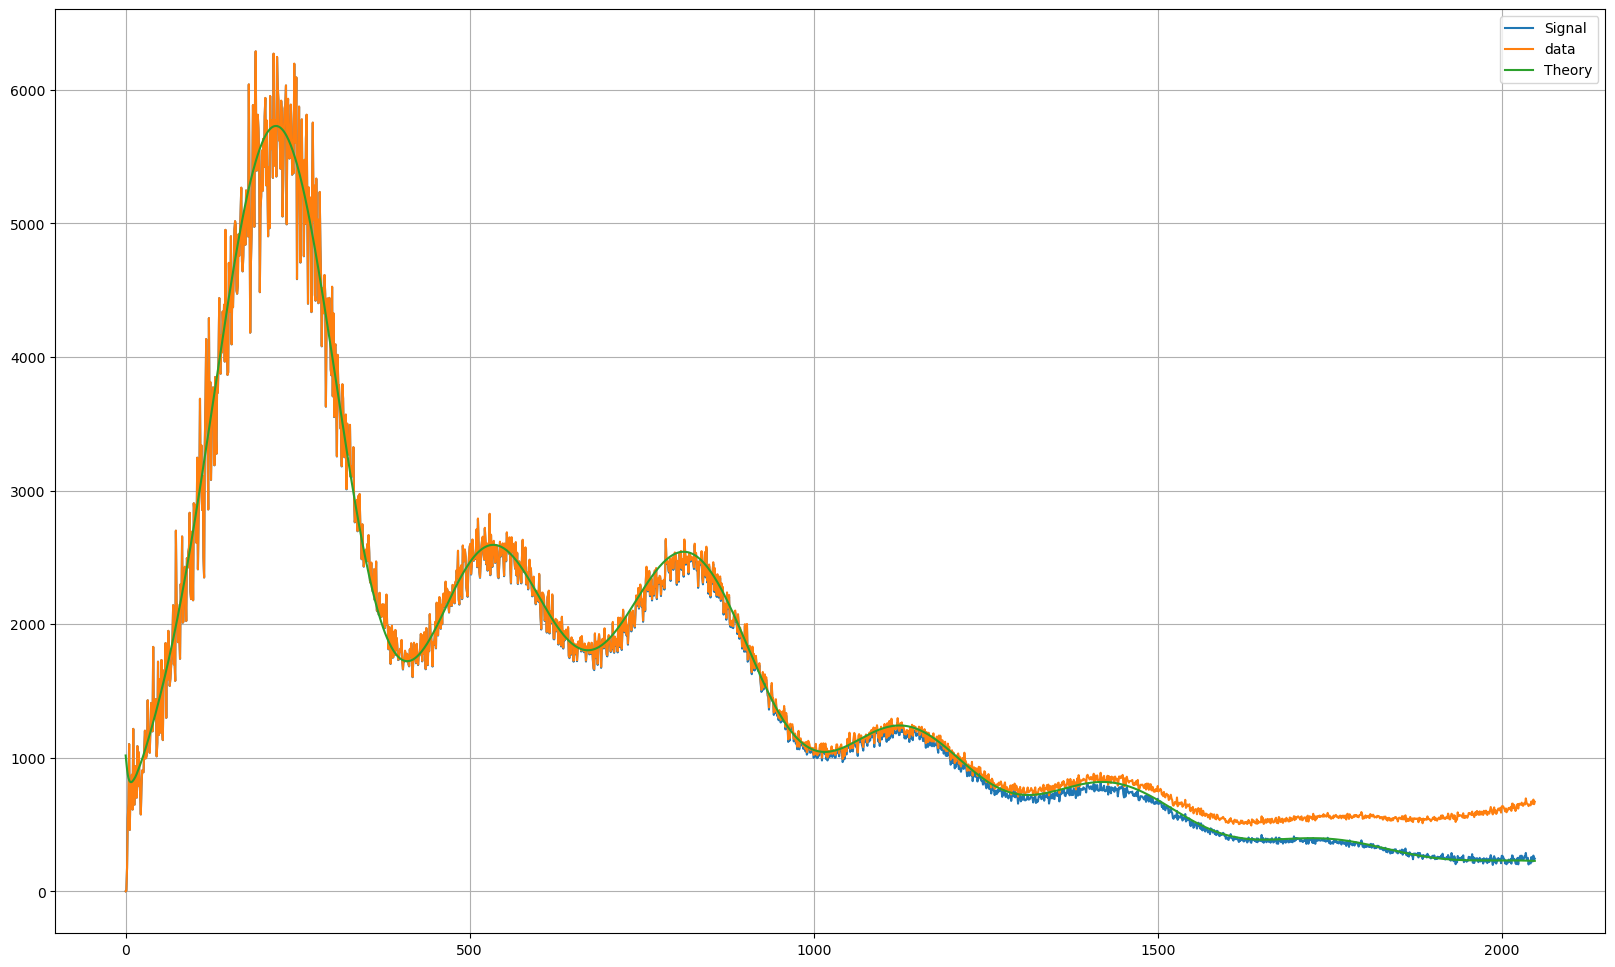

In [6]:
el = np.arange(len(signal))
plt.figure(figsize=(20,12))
plt.plot(el, el*(el+1)*signal/ 2 / np.pi, label="Signal")
plt.plot(el, el*(el+1)*Dl/ 2 / np.pi, label="data")
plt.plot(el, cl_th[el, 1], label="Theory")
plt.grid()

plt.legend()